In [2]:
import warnings 
warnings.filterwarnings(action = 'ignore')

import sys
print("Python version:", sys.version)

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import numpy as np
print(np.__version__)

Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
TensorFlow version: 2.20.0
1.26.4


In [3]:
#!pip install numpy==1.26.4


In [9]:
#tensorflow
import tensorflow as tf
import warnings 
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

In [2]:
#basic operations - sum, diff, prod of 2 array
tensor_a= tf.constant([[1, 2], [3,4]],dtype=tf.float32)
tensor_b= tf.constant([[5, 6], [7,8]],dtype=tf.float32)

In [3]:

result_add = tf.add(tensor_a, tensor_b)
result_sub = tf.subtract(tensor_a, tensor_b)
result_mul = tf.multiply(tensor_a, tensor_b)
result_div = tf.divide(tensor_a, tensor_b)
result_square = tf.square(tensor_a)
result_sqrt = tf.sqrt(result_square)
result_exp = tf.exp(tensor_a)
result_log = tf.math.log(tensor_a)

print(result_add)
print(result_sub)
print(result_mul)
print(result_div)
print(result_square)
print(result_sqrt)
print(result_exp)
print(result_log)


tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 2.7182817  7.389056 ]
 [20.085537  54.59815  ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.        0.6931472]
 [1.0986123 1.3862944]], shape=(2, 2), dtype=float32)


In [8]:
# reduction operator

result_sum = tf.reduce_sum(tensor_a, axis =1)
result_mean = tf.reduce_mean(tensor_a)
result_max = tf.reduce_max(tensor_a)
print(result_sum)
print(result_mean)
print(result_max)

tf.Tensor([3. 7.], shape=(2,), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [4]:
#matrix operator
result_matmul = tf.matmul(tensor_a, tensor_b)
result_trans = tf.transpose(tensor_a)
result_inverse = tf.linalg.inv(tensor_a)

print(result_matmul)
print(result_trans)
print(result_inverse)

tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-2.   1. ]
 [ 1.5 -0.5]], shape=(2, 2), dtype=float32)


In [4]:
#indexing and slicing

element = tensor_a[0,0]

slice_a = tensor_a[:,1]
print(element)
print(slice_a)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor([2. 4.], shape=(2,), dtype=float32)


## graphs and session

In [3]:
c = tf.matmul(tensor_a,tensor_b)


In [5]:
print(tf.compat.v1.get_default_graph().as_graph_def())

versions {
  producer: 1205
}



In [10]:
#tensorboard
#with tf.compat.v1.Session() as sess:
#    writer = tf.summary.FileWriter(logdir='logs', graph = sess.graph)
#    writer.close()

#with tf.compat.v1.Session() as sees:
#    result = sees.run(c)
#    print("Result:", result)

In [3]:
#running a tensorflow swssion
a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a,b)

result = c.numpy()
print("result: ", result)

result:  5


In [14]:
# manage graph
graph = tf.Graph()
with graph.as_default():
    a = tf.constant(2)
    b = tf.constant(3)
    c = tf.add(a,b)

with tf.compat.v1.Session(graph=graph) as sees:
    result = sees.run(c)
    print("Result:", result)
#sees.close()

Result: 5


In [19]:
#to disable the tensorflow 1.x
tf.compat.v1.disable_eager_execution()

#define optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# basic neural network
input_size = 784 #no. of input features(e.g pixels)
hidden_size = 128 #no. of neurons
output_size = 10  #no. of output classes(e.g digits 0-9)

x = tf.compat.v1.placeholder(tf.float32, shape=[None, input_size])
y = tf.compat.v1.placeholder(tf.float32, shape = [None, output_size])

hidden_layer = tf.compat.v1.layers.dense(inputs=x, units=hidden_size, activation=tf.nn.relu)
output_layer = tf.compat.v1.layers.dense(inputs=hidden_layer , units=output_size)

loss =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits = output_layer))

#optimization algo
optimize = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001)
train_op = optimizer.minimize(loss)

C:\Users\nsubh\AppData\Local\Temp\ipykernel_16020\935050701.py:15: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden_layer = tf.compat.v1.layers.dense(inputs=x, units=hidden_size, activation=tf.nn.relu)
C:\Users\nsubh\AppData\Local\Temp\ipykernel_16020\935050701.py:16: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output_layer = tf.compat.v1.layers.dense(inputs=hidden_layer , units=output_size)


In [22]:
#initilize
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sees:
    sees.run(init)

In [ ]:
'''
for epoch in range(num_epochs):
    curr_loss = sees.run([train_op , loss], feed_dict = {X:input_data, y:target_labels})

    print(f"Epochs {epoch+1}, loss: {curr_loss}")


accuracy = sees.run(accuracy_op, feed_dict = {X:test_data, y: test_labels})
print("test Accuracy", accuracy)

'''

## KERAS -API

In [4]:
# building a basic neural network

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# define the model
model = Sequential([
    Flatten(input_shape = (28,28)),

    #input
    Dense(128, activation = 'relu'),
    #hidden
    Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## step 2 in comment
""" 
 train the model
 model.fit(train_images, train_labels , epochs = 10, batch_size = 32, validation_data = (val_images , val_labels))

 #evaluate
 loss, accuracy = model.evaluate(test_images,test_labels)
 print("test Loss ", loss)
 print("test Accuracy ", accuracy)
"""

#### a complex layer `a functional API`

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import MaxPooling2D , Flatten , Conv2D, Input , Dense

#input
inputs = Input(shape = (28,28,1))

#hidden
conv1 = Conv2D(32, kernel_size = (3,3), activation = 'relu')(inputs)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)
conv2 = Conv2D(64, kernel_size = (3,3), activation = 'relu')(pool1)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)

#flatten
flatten = Flatten()(pool2)

#dense
dense = Dense(128 , activation = 'relu')(flatten)
outputs = Dense(10 ,activation = 'relu')(dense)

#compile
model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


## data preparation 
  `using mnist`

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape((-1,28,28,1)).astype('float32')/255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test , 10)

#split the data
x_train, x_val, y_train, y_val = tts(x_train,y_train, test_size = 0.2, random_state = 42)

In [7]:
# Model building
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import MaxPooling2D , Flatten , Conv2D, Input , Dense

model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# train the data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

#evaluation
test_loss , test_accuracy = model.evaluate(x_test,y_test)
print("test loss", test_loss)
print("test accuracy", test_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9516 - loss: 0.1659 - val_accuracy: 0.9777 - val_loss: 0.0756
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.9804 - val_loss: 0.0629
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9837 - val_loss: 0.0539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9946 - loss: 0.0157 - val_accuracy: 0.9859 - val_loss: 0.0503
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9867 - val_loss: 0.0537
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9848 - val_loss: 0.0643
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9977 -

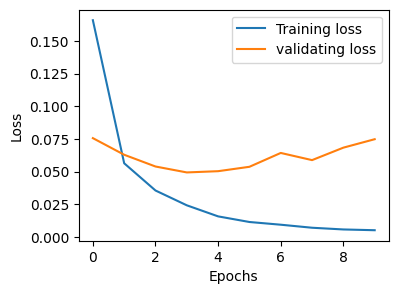

In [13]:
# ploting
plt.figure(figsize = (4,3))
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'validating loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# make predictions
#pred = model.predict(x_new_data)